In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import matplotlib.image as mpimg
from glob import glob
import cv2

import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [9]:
from zipfile import ZipFile

data_path = '/content/traffic_Data.zip'
with ZipFile(data_path, 'r') as zip:
   zip.extractall()

In [11]:
# Path to the folder containing dataset
dataset = '/content/traffic_Data/DATA'
# Path of the label file
labelfile = pd.read_csv('/content/labels.csv')

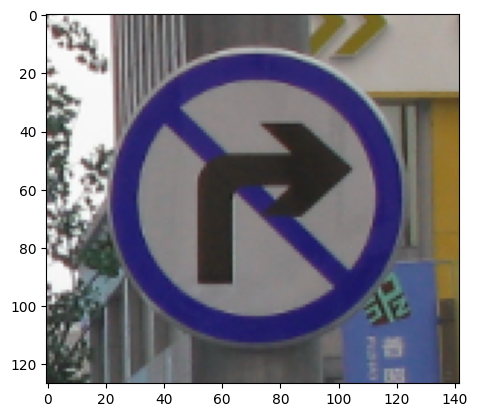

In [14]:
# Visualize few images
img = cv2.imread("/content/traffic_Data/DATA/13/013_0001.png")
plt.imshow(img)

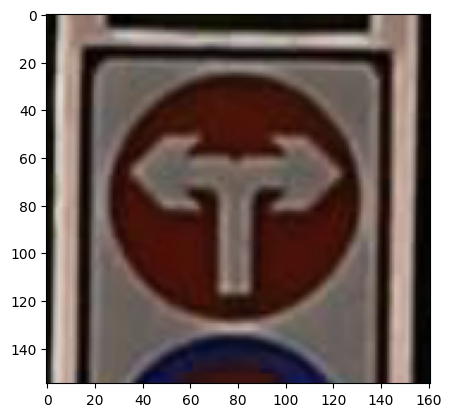

In [15]:
img = cv2.imread("/content/traffic_Data/DATA/23/023_1_0002_1_j.png")
plt.imshow(img)

In [17]:
print(labelfile.head())
print()
print(labelfile.tail())

   ClassId                  Name
0        0   Speed limit (5km/h)
1        1  Speed limit (15km/h)
2        2  Speed limit (30km/h)
3        3  Speed limit (40km/h)
4        4  Speed limit (50km/h)

    ClassId         Name
53       53     Give Way
54       54  No stopping
55       55     No entry
56       56     Unknown7
57       57     Unknown8


In [19]:
# Data Preparation for training and testing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
                                                               subset = 'training',
                                                               image_size = (224, 224),
                                                               seed = 123,
                                                               batch_size=32)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
                                                               subset = 'validation',
                                                               image_size = (224, 224),
                                                               seed = 123,
                                                               batch_size=32)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [20]:
class_numbers =  train_ds.class_names
class_names = []
for i in class_numbers:
    class_names.append(labelfile['Name'][int(i)])

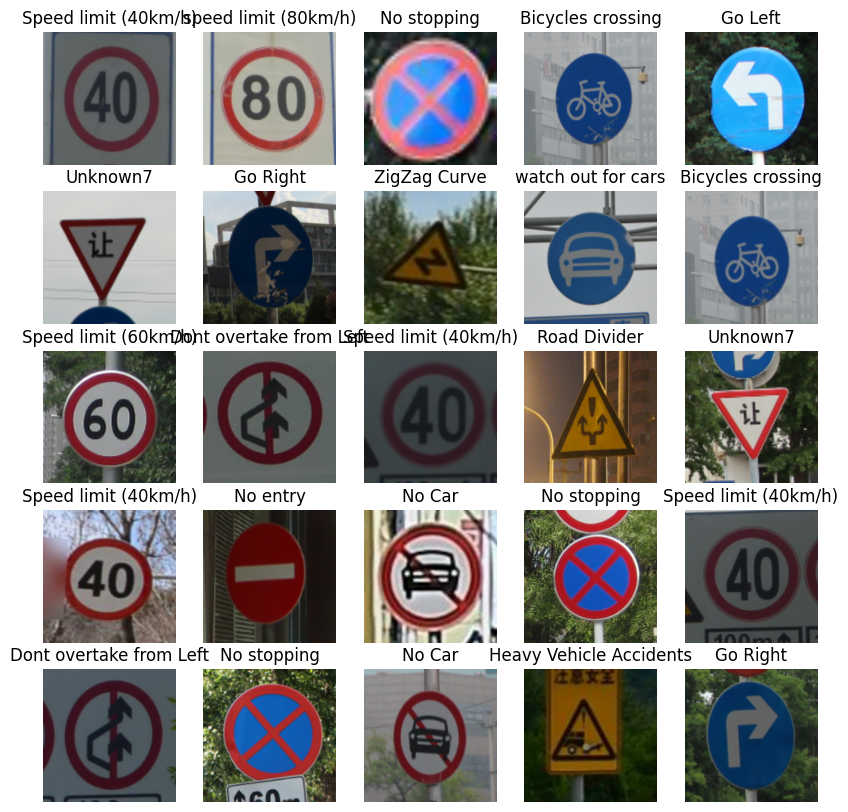

In [24]:
# Let's visualize train dataset and print 25 images from the dataset
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [40]:
# Data Augmentation

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal", input_shape=(224, 224, 3)),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomFlip(mode="horizontal_and_vertical")

])